In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau


sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

In [2]:
dtype_dict = {
    'Date': 'str',
    'FarmName_Pseudo': 'str',
    'SE_Number': 'str',
    'Age': 'Int64',
    'BreedName': 'str',
    'DailyYield': 'float',
    'PreviousDailyYield': 'float',
    'DailyYieldChange': 'float',
    'DaysInMilk': 'Int64',
    'YearSeason': 'str',
    'LactationNumber': 'Int64',
    'ExpectedYield': 'float',
    'NormalizedDailyYield': 'float',
    'NormalizedDailyYieldChange': 'float',
    'HeatStress': 'Int64',
    'Temp15Threshold': 'Int64',
    'HW': 'Int64',
    'cum_HW': 'Int64',
    'MeanTemperature': 'float',
    'MeanTHI_adj': 'float'
}

milk_data = pd.read_csv('../Data/MergedData/HeatApproachYieldDataTest.csv', dtype=dtype_dict)
milk_data['Date'] = pd.to_datetime(milk_data['Date'], format='%Y-%m-%d')
milk_data.head(-5)

,Date,FarmName_Pseudo,SE_Number,Age,BreedName,LactationNumber,DaysInMilk,YearSeason,DailyYield,PreviousDailyYield,...,NormalizedDailyYieldChange,Residuals,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj,HeatLoad,CumulativeHeatLoad
0,2022-05-28,a624fb9a,SE-064c0cec-1189,3242,02 SLB,8,3,2022-2,15.22,NaN,...,NaN,1.820438,0,0,0,0,9.912500,50.478673,-10.521327,0.000000
1,2022-05-29,a624fb9a,SE-064c0cec-1189,3243,02 SLB,8,4,2022-2,18.96,15.22,...,0.215311,1.589745,0,0,0,0,10.066667,53.841648,-7.158352,0.000000
2,2022-05-30,a624fb9a,SE-064c0cec-1189,3244,02 SLB,8,5,2022-2,22.64,18.96,...,0.177389,1.894598,0,1,0,0,10.466667,52.935959,-8.064041,0.000000
3,2022-05-31,a624fb9a,SE-064c0cec-1189,3245,02 SLB,8,6,2022-2,26.49,22.64,...,0.163049,2.877443,0,0,0,0,11.183333,52.872112,-8.127888,0.000000
4,2022-06-01,a624fb9a,SE-064c0cec-1189,3246,02 SLB,8,7,2022-3,33.61,26.49,...,0.273358,7.563598,0,1,0,0,12.704167,56.056547,-4.943453,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576066,2024-08-09,f454e660,SE-f454e660-810,1020,99 Korsning/obestämbar ras,1,365,2024-3,37.53,31.36,...,0.168909,1.001508,1,1,0,0,18.650000,62.298109,1.298109,84.512273
576067,2024-08-10,f454e660,SE-f454e660-810,1021,99 Korsning/obestämbar ras,1,365,2024-3,36.48,37.53,...,-0.028745,-0.048492,1,1,0,0,18.308333,54.687773,-6.312227,71.887820
576068,2024-08-11,f454e660,SE-f454e660-810,1022,99 Korsning/obestämbar ras,1,365,2024-3,34.76,36.48,...,-0.047087,-1.768492,1,1,0,0,17.841667,55.974084,-5.025916,61.835988
576069,2024-08-12,f454e660,SE-f454e660-810,1023,99 Korsning/obestämbar ras,1,365,2024-3,38.06,34.76,...,0.090340,1.531508,1,1,0,0,17.516667,60.115007,-0.884993,60.066002


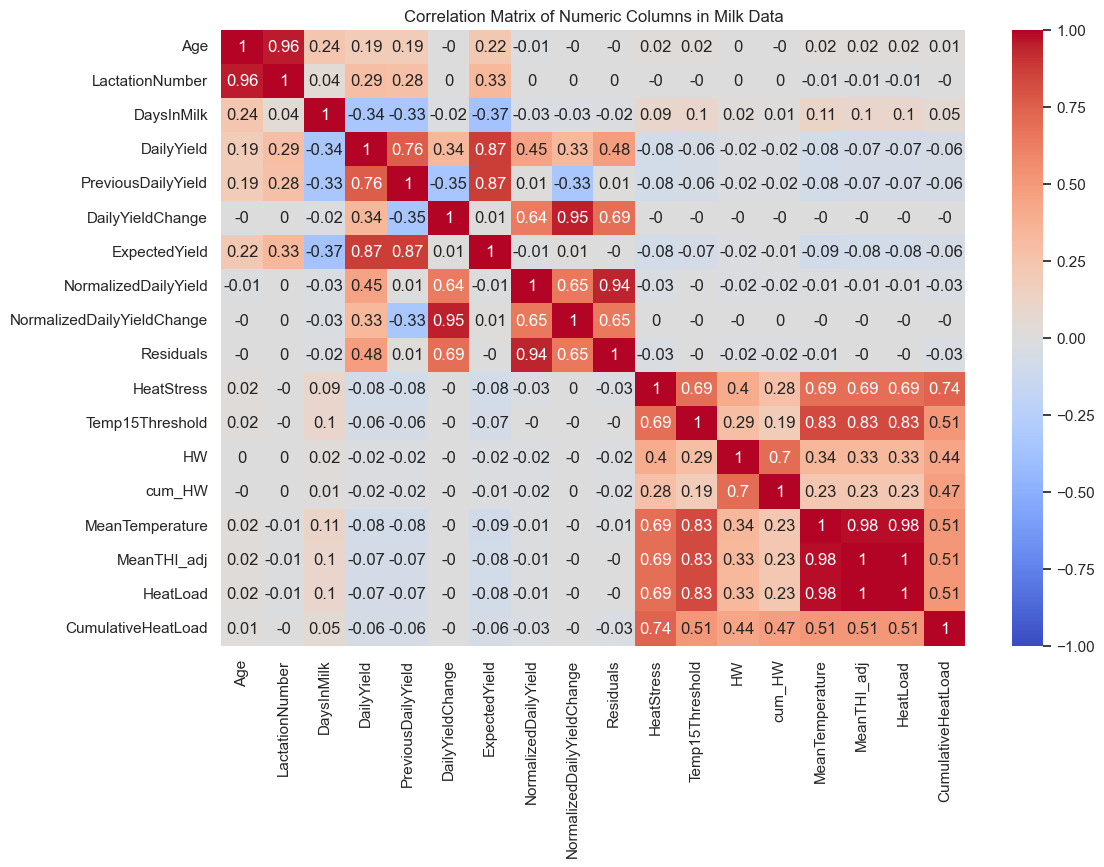

In [3]:
# Filter out only numeric columns
numeric_cols = milk_data.select_dtypes(include=['float64', 'int64']).columns
milk_data_numeric = milk_data[numeric_cols]

# Calculate the correlation matrix
corr_matrix = milk_data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns in Milk Data')
plt.show()

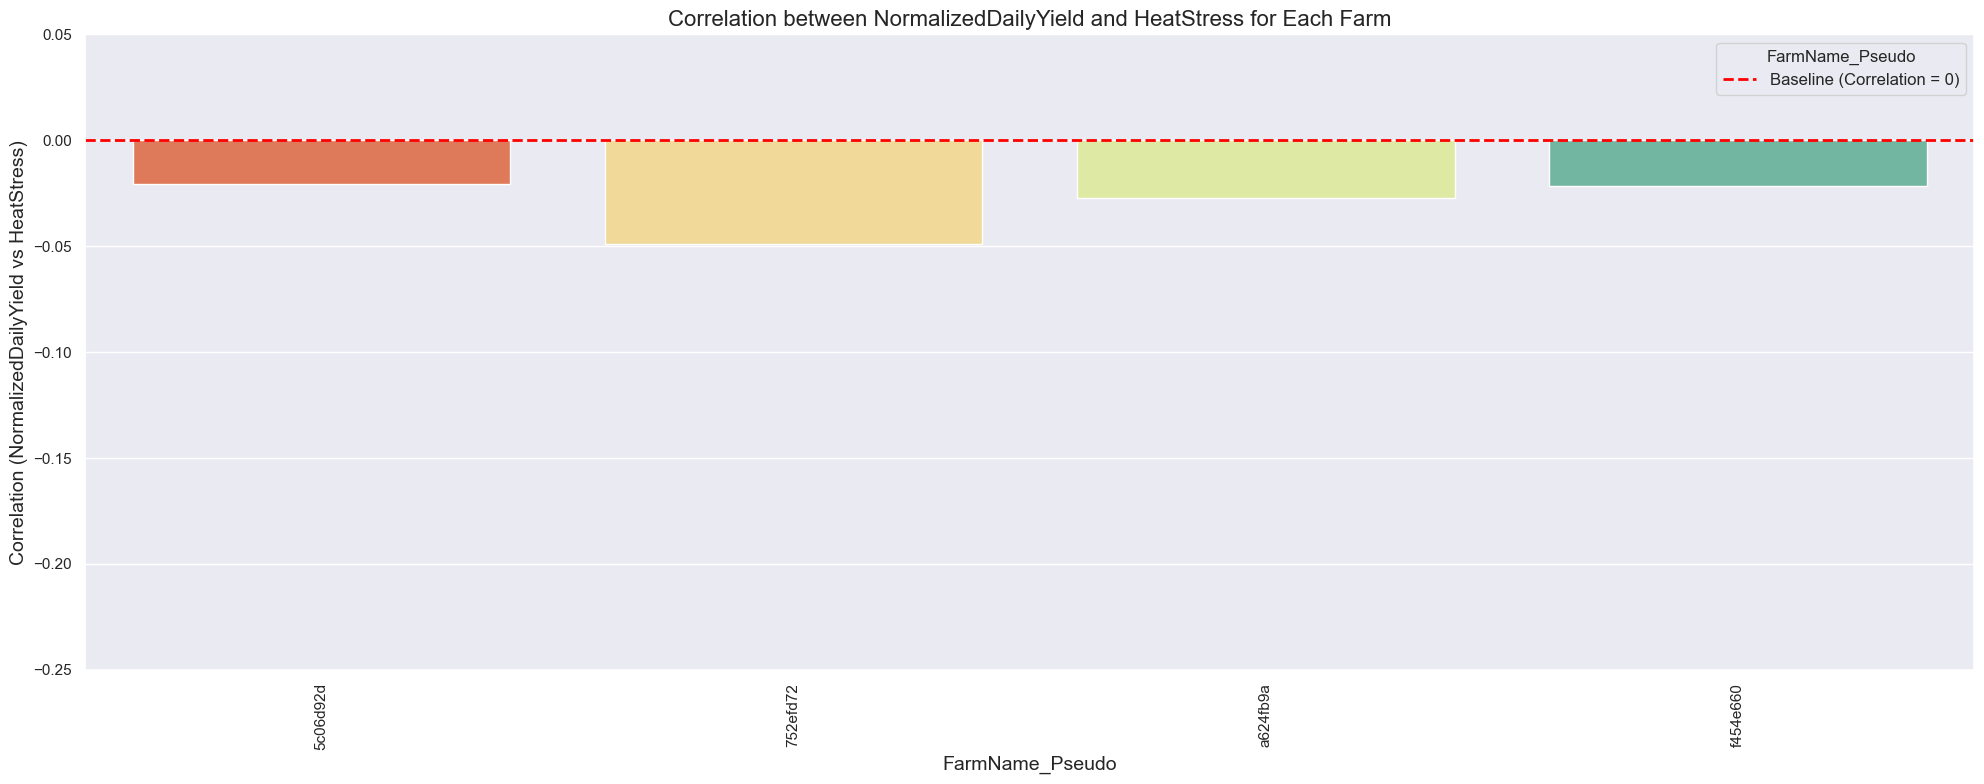

In [4]:
# Calculate correlation manually
grouped = milk_data.groupby('FarmName_Pseudo')
correlations = pd.DataFrame({
    'FarmName_Pseudo': list(grouped.groups.keys()),
    'Correlation': [grouped.get_group(name)[['NormalizedDailyYield', 'HeatStress']].corr().iloc[0, 1] for name in grouped.groups.keys()]
})

# Plotting
plt.figure(figsize=(20, 8))  # Adjust the figure size to zoom out a bit
barplot = sns.barplot(x='FarmName_Pseudo', y='Correlation', data=correlations, palette='Spectral', hue='FarmName_Pseudo', dodge=False, errorbar=None)

# Add baseline line
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Baseline (Correlation = 0)')

# Formatting the plot
plt.xlabel('FarmName_Pseudo', fontsize=14)
plt.ylabel('Correlation (NormalizedDailyYield vs HeatStress)', fontsize=14)
plt.title('Correlation between NormalizedDailyYield and HeatStress for Each Farm', fontsize=16)

plt.ylim(-0.25, 0.05)  # Adjust y-axis limits to show some area above 0
plt.xticks(rotation=90)
plt.legend(fontsize=12, loc='upper right', title='FarmName_Pseudo')
plt.tight_layout()
plt.show()

In [5]:
# Output the correlation values in a nice table format
correlation_table = correlations.sort_values(by='Correlation', ascending=False)
print("\nCorrelation values between NormalizedDailyYield and HeatStress for each Farm:")
print(correlation_table.to_string(index=False))


Correlation values between NormalizedDailyYield and HeatStress for each Farm:
FarmName_Pseudo  Correlation
       5c06d92d    -0.020482
       f454e660    -0.021634
       a624fb9a    -0.027083
       752efd72    -0.048970


In [6]:
# Calculate correlations for each farm using Pearson, Spearman, and Kendall methods
grouped = milk_data.groupby('FarmName_Pseudo')

# Initialize a DataFrame to store the correlations
correlations = pd.DataFrame({
    'FarmName_Pseudo': list(grouped.groups.keys()),
    'Pearson': [grouped.get_group(name)[['NormalizedDailyYield', 'HeatStress']].corr().iloc[0, 1] for name in grouped.groups.keys()],
    'Spearman': [spearmanr(grouped.get_group(name)['NormalizedDailyYield'], grouped.get_group(name)['HeatStress'])[0] for name in grouped.groups.keys()],
    'Kendall': [kendalltau(grouped.get_group(name)['NormalizedDailyYield'], grouped.get_group(name)['HeatStress'])[0] for name in grouped.groups.keys()]
})

correlations

,FarmName_Pseudo,Pearson,Spearman,Kendall
0,5c06d92d,-0.020482,-0.011226,-0.009166
1,752efd72,-0.048970,-0.026765,-0.021854
2,a624fb9a,-0.027083,-0.032519,-0.026552
3,f454e660,-0.021634,-0.020216,-0.016507
